In [5]:
from plotting_scripts import *

In [6]:
pream = "../data_delta/sv"
problems = ['ldc3d']
p_range = (3,11)
r_range = (1,3)

def get_frames(pream, ext, p_range=(3,11), r_range=(1,2)):

    df_list = []
    for p in range(*p_range):
        for r in range(*r_range):
            p = str(p).zfill(2)
            file_name = f'{pream}/r{r}_k{p}_{ext}/results.pkl'
            df_list.append(pd.read_pickle(file_name))

    merged_df = pd.concat(df_list, ignore_index=True)
    sorted_df = merged_df.sort_values(by=['order', 'ref'], ascending=[True, True])

    for name in ['nu', 'Re', 'ncells', 'udofs', 'pdofs']:
        try:
            sorted_df.pop(name)
        except:
            pass

    sorted_df = sorted_df.reset_index(drop=True)
    
    return sorted_df


# Approximate full-block factorization (AFBF) hmg

In [9]:
afbf_hmg_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    hmg_data =  {}

    for h_sweeps in [3]:
        path_loc = f'{pream}/afbf_hmg_asmstarpc/{problem}/parallel_V3'
        
        hmg = get_frames(path_loc, f"V{h_sweeps}",  
                        p_range=p_range, r_range=r_range)

        hmg_data[r'FBF$\left(V^{%s}_{h\textnormal{MG}}\right)$' % rf'\left(\nu_h^s={h_sweeps}\right)'] = hmg

    afbf_hmg_data[problem] = hmg_data





ldc3d===================================================


# Approximate full-block factorization (AFBF) Direct

In [10]:
afbf_direct_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    hmg_data =  {}

    p_sweeps = h_sweeps = 3
    h_cycles = 1

    path_loc = f'{pream}/afbf_patch_pc/{problem}/parallel'

    hmg = get_frames(path_loc, f"V{h_cycles}_p{p_sweeps}_h{h_sweeps}",  
                    p_range=p_range, r_range=r_range)

    hmg_data[r'FBF$\left(V^{%s}_{ph\textnormal{MG(direct)}}\right)$' % rf'\left(\nu_h^s={h_sweeps}\right)'] = hmg
    
    #plot_all(hmg_data, warm=True)
    afbf_direct_data[problem] = hmg_data


ldc3d===================================================


# phMG(direct)

In [11]:
phmg_direct_data =  {}

for problem in problems:
    print(f"{problem}===================================================")
    phmg_data =  {}

    for h_cycles in range(2,3):
        for p_sweeps, h_sweeps in [(2,3)
                                  ]:
            df = get_frames(f'{pream}/phmg/{problem}/parallel', f"V{h_cycles}_p{p_sweeps}_h{h_sweeps}",  
                    p_range=p_range, r_range=r_range)
    
            if p_sweeps == h_sweeps:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h^s={p_sweeps})'] = df
            else:
                phmg_data[r'$V^{%s}_{ph\textnormal{MG(direct)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h^s={h_sweeps})'] = df
    

    #plot_all(phmg_data)
    phmg_direct_data[problem] = phmg_data

df

ldc3d===================================================


,order,ref,ndofs,linear_iter,overall_time(s),warm_time(s),resids,solver_params,StokesSolver:init(count),StokesSolver:init(flops),...,VecScatterBegin(flops):Warm,VecScatterBegin(time):Warm,VecScatterEnd(count):Warm,VecScatterEnd(flops):Warm,VecScatterEnd(time):Warm,ASMPatch(size):Warm,ASMPatch(count):Warm,ASMPatch(times):Warm,ASMPatch(flops):Warm,PatchSizes:Warm
0,3,1,4760943,26,226.298356,64.225983,"[21.567931844486875, 2.7247456954648532, 0.519...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,5.077050e+05,...,0.0,2.005368,663034.666667,6.240695e+06,11.763532,"[984024, 4760943]","[312.0, 104.0]","[11.97328406001381, 30.506307605624993]","[4352414781.0, 19369308098.11111]","[{145: 48000, 1182: 2166, 2253: 6859, 438: 114..."
1,3,2,13037895,28,148.266523,52.276966,"[22.666045436995372, 3.3234529003694226, 0.690...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,5.220201e+05,...,0.0,1.396502,816296.833333,8.611234e+06,8.785396,"[579968, 2687360, 13037895]","[336.0, 336.0, 112.0]","[2.325175752359383, 7.618056218255188, 20.4549...","[1516336472.0, 4842913271.0, 21128057234.083332]","[{145: 131712, 438: 162, 810: 288, 996: 840, 1..."
2,4,1,5296707,23,210.132480,65.186722,"[21.891270178358987, 3.391928036903362, 0.5582...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,6.057191e+05,...,0.0,1.221626,302639.111111,6.008793e+06,14.416255,"[505940, 5296707]","[276.0, 92.0]","[5.800865838097227, 40.27702474601389]","[1971639472.6666667, 28933005067.27778]","[{287: 24576, 4707: 3375, 2445: 1350, 1665: 90..."
3,4,2,13742523,30,190.162215,59.061247,"[22.88814082342411, 4.7122641929160025, 0.8300...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,5.900679e+05,...,0.0,1.011863,428541.250000,9.095192e+06,12.834587,"[285542, 1307750, 13742523]","[360.0, 360.0, 120.0]","[1.6616429229895733, 3.954211778536464, 33.996...","[785460941.25, 2510999311.875, 36700204434.375]","[{287: 63888, 885: 126, 2055: 528, 2445: 952, ..."
4,5,1,4154223,26,369.880503,80.348492,"[23.484170613304546, 3.7520651174610977, 0.615...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,6.494436e+05,...,0.0,1.109516,146547.555556,6.311458e+06,24.352992,"[214960, 4154223]","[312.0, 104.0]","[2.716964943416613, 56.32553281787503]","[942480725.3333334, 36457425347.77778]","[{503: 10368, 2973: 66, 4383: 726, 8493: 1331,..."
5,5,2,13983033,32,347.844327,86.210986,"[24.55943528369775, 5.0199605466565025, 0.8882...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.213669e+05,...,0.0,0.796333,253458.333333,1.045863e+07,20.673800,"[158818, 718690, 13983033]","[384.0, 384.0, 128.0]","[0.9162033821354747, 2.7185020386302283, 51.85...","[457480766.0, 1469746904.0, 56643407353.333336]","[{503: 34992, 3678: 360, 4383: 618, 6378: 648,..."
6,6,1,4022943,28,483.160843,110.106677,"[26.90636364947198, 3.636965035893466, 0.69903...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,7.122883e+05,...,0.0,0.550260,92686.222222,7.223185e+06,32.379660,"[125114, 4022943]","[336.0, 112.0]","[1.5399083233055078, 71.63897772530557]","[586589873.3333334, 49612882285.55556]","[{809: 6000, 4830: 54, 7140: 486, 13899: 729, ..."
7,6,2,16426851,36,633.962055,153.823587,"[28.368719009185547, 5.399813748243563, 1.0110...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.093277e+06,...,0.0,0.844669,202211.500000,1.412308e+07,39.890376,"[112724, 505940, 16426851]","[432.0, 432.0, 144.0]","[1.41804348139079, 2.681870206838541, 93.32085...","[360072389.25, 1158696884.25, 99556562989.5]","[{809: 24576, 5985: 288, 7140: 478, 11589: 448..."
8,7,1,3200571,30,627.905530,147.907075,"[33.862197589743445, 4.144991499282266, 0.7460...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.086841e+05,...,0.0,0.657489,52240.000000,7.370030e+06,47.526837,"[64620, 3200571]","[360.0, 120.0]","[3.914529816625072, 85.26322579899997]","[322155810.0, 53668419585.0]","[{1221: 3072, 3804: 42, 10860: 294, 21213: 343..."
9,7,2,10769223,38,698.547884,126.914253,"[36.4

# phMG(gradual)

In [6]:
# phmg_grad_data_r1 =  {}
# problem = 'ldc3d'

# r_range = (1,2)
# p_range = (3,11)

# phmg_data =  {}


# for h_cycles, p_sweeps, h_sweeps in [(1,3,3)]:
        
#     df = get_frames(f'{pream}/phmg_grad/{problem}/parallel', f"V{h_cycles}_p{p_sweeps}_h{h_sweeps}",  
#                     p_range=p_range, r_range=r_range)

#     if p_sweeps == h_sweeps:
#         name = r'$V^{%s}_{phmg(gradual)}$' % rf'(n_V={h_cycles},\nu_p=\nu_h={h_sweeps})'
#     else:
#         name = r'$V^{%s}_{phmg(gradual)}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps})'
        
#     phmg_data[name] = df
#     check_timings(df)
#     phmg_grad_data_r1[problem] = phmg_data

# r_range = (2,3)
# phmg_grad_data_r2 =  {}
# phmg_data =  {}
# for h_cycles, p_sweeps, h_sweeps in [(2,3,3)]:
        
#     df = get_frames(f'{pream}/phmg_grad/{problem}/parallel', f"V{h_cycles}_p{p_sweeps}_h{h_sweeps}",  
#                     p_range=p_range, r_range=r_range)

#     if p_sweeps == h_sweeps:
#         name = r'$V^{%s}_{phmg(gradual)}$' % rf'(n_V={h_cycles},\nu_p=\nu_h={h_sweeps})'
#     else:
#         name = r'$V^{%s}_{phmg(gradual)}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps})'
        
#     phmg_data[name] = df
#     check_timings(df)
#     phmg_grad_data_r2[problem] = phmg_data


# # for i, r in enumerate(list(df[df['ref'] == 2]['resids'].values)):
# #     plt.semilogy(r, label=f'k={i+3}')
# # plt.legend()
# # plt.show()

# print(phmg_grad_data_r1['ldc3d'].keys())
# print(phmg_grad_data_r2['ldc3d'].keys())

In [13]:
phmg_grad_data =  {}
problem = problems[0]

phmg_data =  {}
for h_cycles, p_sweeps, h_sweeps in [(2,2,3)]:
        
    df = get_frames(f'{pream}/phmg_grad/{problem}/parallel_V2_p2_h3', f"V{h_cycles}_p{p_sweeps}_h{h_sweeps}",  
                    p_range=p_range, r_range=r_range)

    if p_sweeps == h_sweeps:
        name = r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p=\nu_h={h_sweeps})'
    else:
        name = r'$V^{%s}_{ph\textnormal{MG(gradual)}}$' % rf'(n_V={h_cycles},\nu_p={p_sweeps},\nu_h={h_sweeps})'
        
    phmg_data[name] = df
    phmg_grad_data[problem] = phmg_data


# All data

In [14]:
problem = 'ldc3d'

data_all_ref1 = {}
data_all_ref2 = {}

for data_dict in [afbf_hmg_data, afbf_direct_data, 
                  phmg_direct_data, phmg_grad_data]:

    tmp = data_dict[problem]
    k,v = list(tmp.items())[0]
    v = v[v['ref'] == 1]
    data_all_ref1.update({k : v})

    k,v = list(tmp.items())[0]
    v = v[v['ref'] == 2]
    data_all_ref2.update({k : v})


/Users/alexey/repos/tmp/phmg_thesis/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


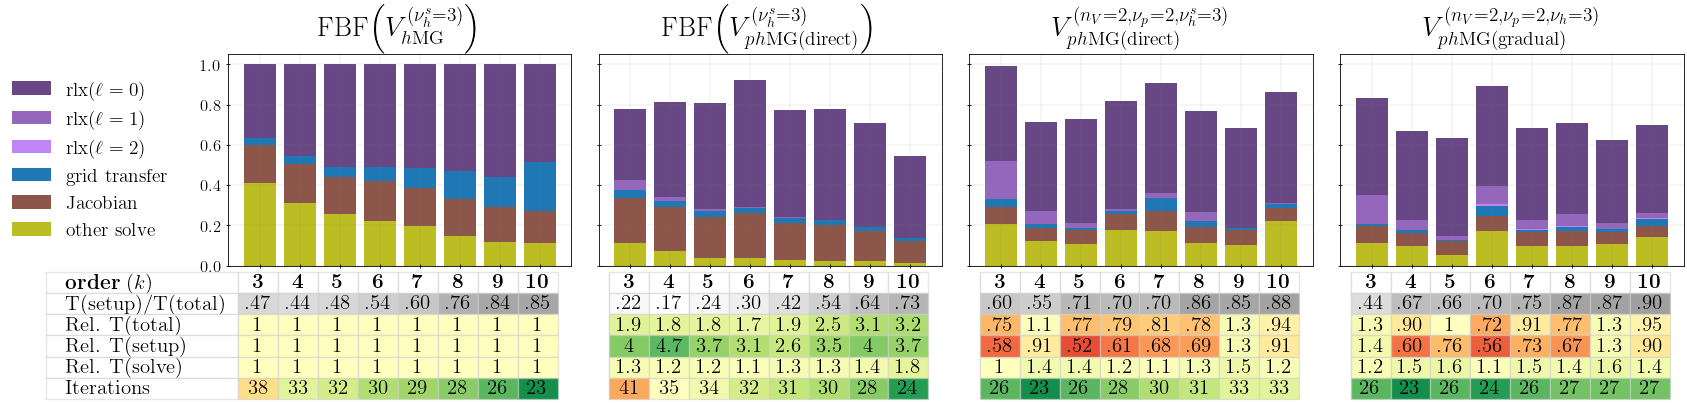

/Users/alexey/repos/tmp/phmg_thesis/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


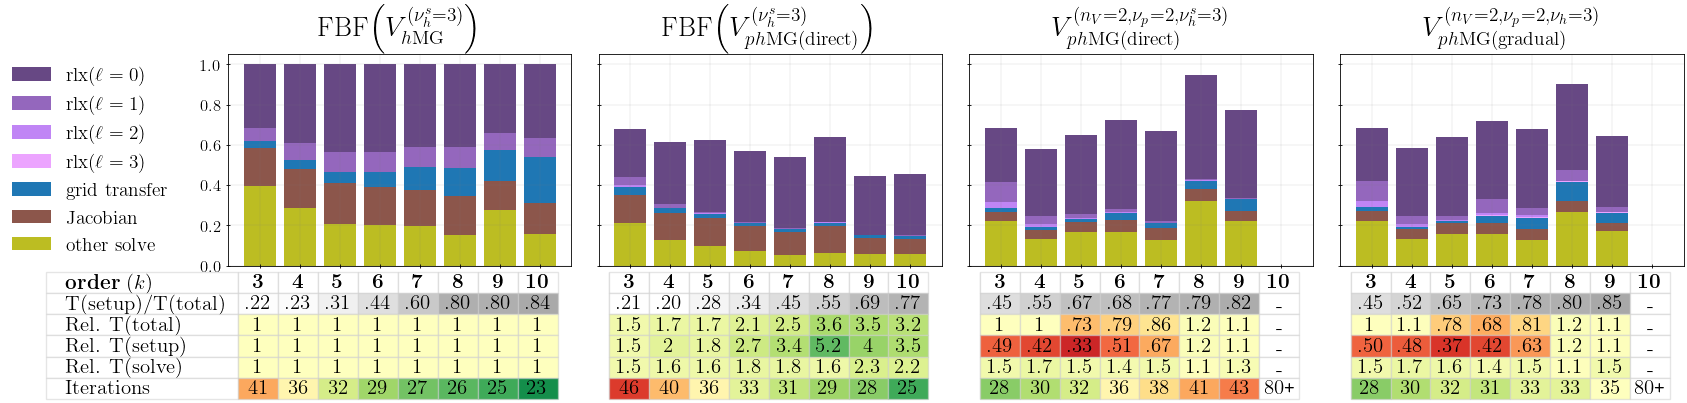

In [15]:
from bar_table import plot_fraction

ref = 1
tmp = plot_fraction(data_all_ref1, f"sv_ldc3d_ref{ref}",  th_disc=False)


ref = 2
tmp = plot_fraction(data_all_ref2, f"sv_ldc3d_ref{ref}",  th_disc=False)